In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import optuna
import yfinance as yf
from datetime import datetime, timedelta

from Classification_strategies import PeakValleyStrategy, plot_price_signals

# DEFINING SIGNALS

In [2]:
## Evaluating with X Years data
years=4.5
# Get today's date
end_date = datetime.today().date()
# Set the start date to one year ago
start_date = end_date - timedelta(days=365*years)


# Select Stock
# ticker = 'AAPL'
ticker = 'NVDA'


# Download the data for the ticker
df = yf.download(ticker, start=start_date, end=end_date)[['Close']]

[*********************100%***********************]  1 of 1 completed


## PEAKS/VALLEYS

No penalty for number of trades

[I 2024-09-28 19:17:18,133] A new study created in memory with name: no-name-dba3e94d-624c-494c-b6dd-0dfe86c14834
[I 2024-09-28 19:17:18,141] Trial 0 finished with value: -7.932375281529874 and parameters: {'distance': 6, 'prominence': 4.740116758692589}. Best is trial 0 with value: -7.932375281529874.
[I 2024-09-28 19:17:18,148] Trial 1 finished with value: -13.258032043370228 and parameters: {'distance': 8, 'prominence': 1.4837396354388523}. Best is trial 1 with value: -13.258032043370228.
[I 2024-09-28 19:17:18,153] Trial 2 finished with value: -11.145977920414166 and parameters: {'distance': 3, 'prominence': 3.462488217663588}. Best is trial 1 with value: -13.258032043370228.
[I 2024-09-28 19:17:18,159] Trial 3 finished with value: -14.851298587773394 and parameters: {'distance': 2, 'prominence': 2.0229680856786505}. Best is trial 3 with value: -14.851298587773394.
[I 2024-09-28 19:17:18,165] Trial 4 finished with value: -12.242691942818595 and parameters: {'distance': 7, 'prominen

Optimized distance: 1
Optimized prominence: 0.10


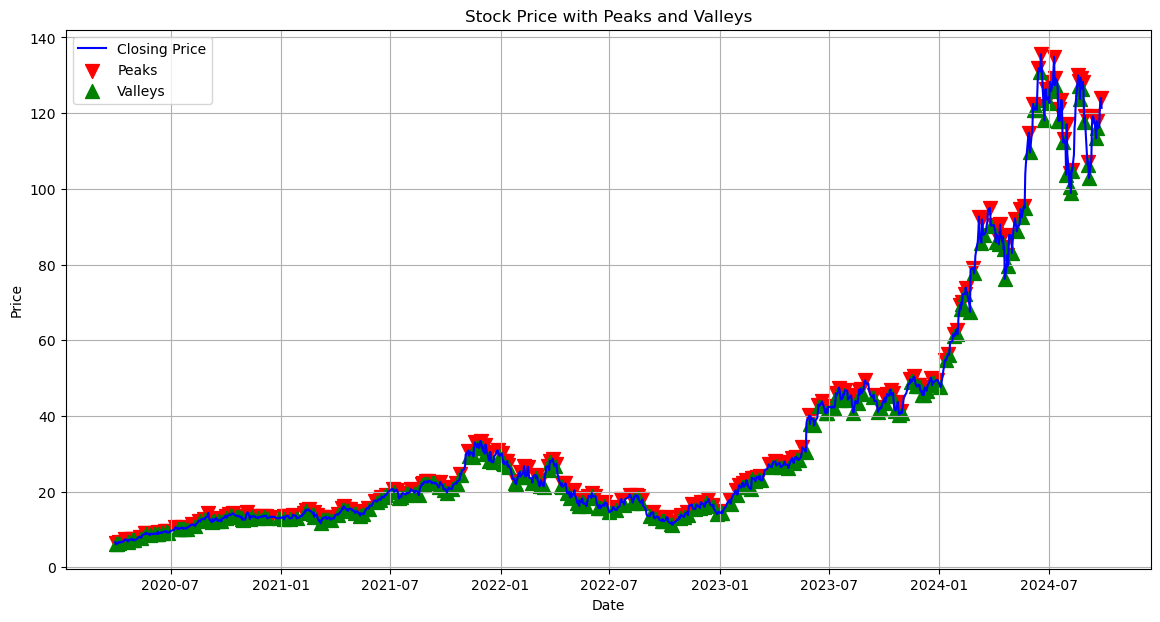

Total number of trades: 967.0
Approx nr Trades per Week: 4.271


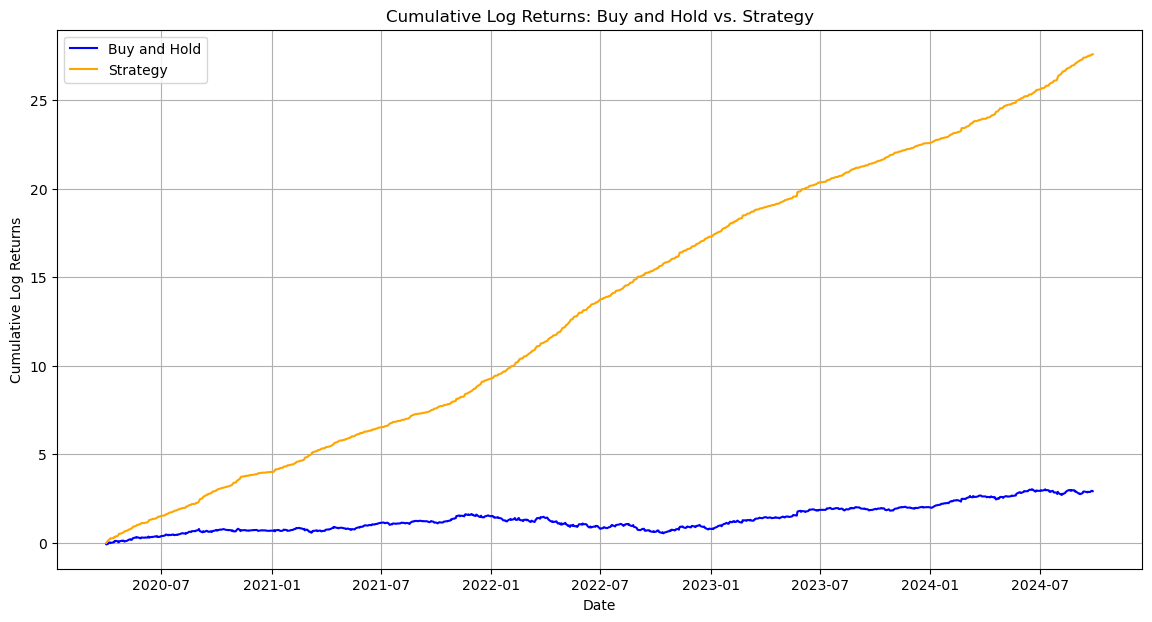

Total Buy and Hold Return: 1742.19%
Total Strategy Return: 95884190848800.42% (55036741.12 1000s Fold B&H)
Total Number of Trades: 967.0
Approx nr Trades per Week: 4.271


In [3]:
# Initialize the class with historical daily data
strategy = PeakValleyStrategy(df)

strategy.optimize_parameters()
strategy.compare_strategy_returns()

With penalty for number of trades

[I 2024-09-28 19:17:19,927] A new study created in memory with name: no-name-a35b4816-148c-4a95-bfb9-0bb5c7d87627
[I 2024-09-28 19:17:19,935] Trial 0 finished with value: 2.3247854943886797 and parameters: {'distance': 6, 'prominence': 4.740116758692589, 'trade_off': 0.1530919518793814}. Best is trial 0 with value: 2.3247854943886797.
[I 2024-09-28 19:17:19,940] Trial 1 finished with value: 21.492423646719285 and parameters: {'distance': 3, 'prominence': 1.1831222799820977, 'trade_off': 0.13724441704749338}. Best is trial 0 with value: 2.3247854943886797.
[I 2024-09-28 19:17:19,947] Trial 2 finished with value: 8.511080138382797 and parameters: {'distance': 2, 'prominence': 2.0229680856786505, 'trade_off': 0.12361046945056185}. Best is trial 0 with value: 2.3247854943886797.
[I 2024-09-28 19:17:19,952] Trial 3 finished with value: 73.63369962283166 and parameters: {'distance': 5, 'prominence': 0.11207791788434224, 'trade_off': 0.17680643647442096}. Best is trial 0 with value: 2.3247854

Optimized distance: 1
Optimized prominence: 0.37


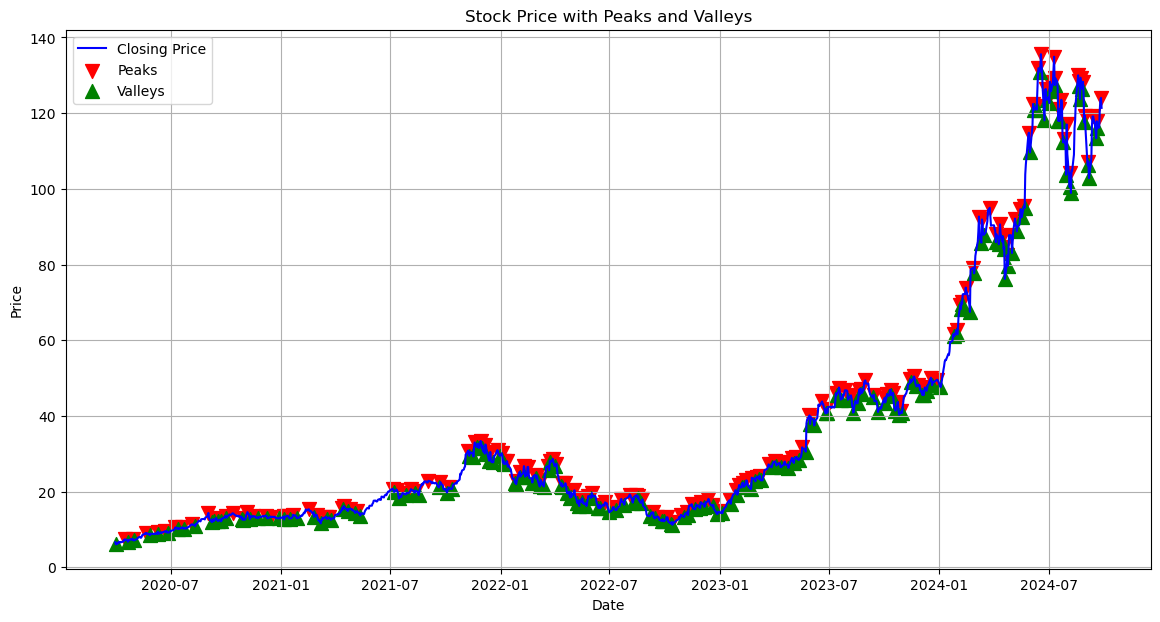

Total number of trades: 699.0
Approx nr Trades per Week: 3.087


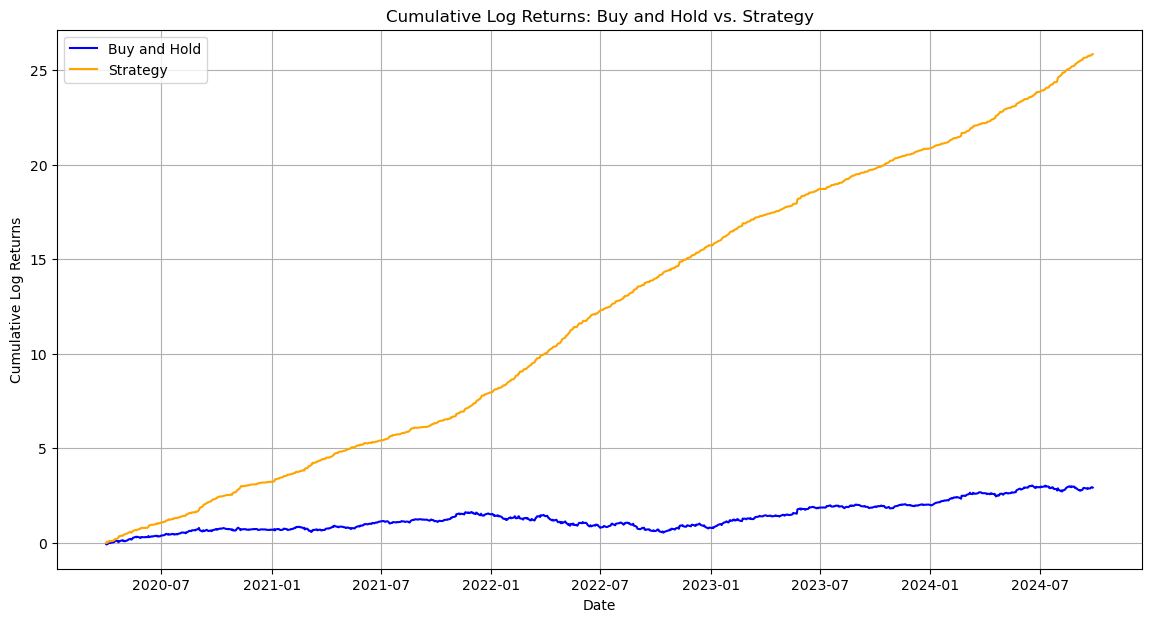

Total Buy and Hold Return: 1742.19%
Total Strategy Return: 16575600108565.32% (9514258.86 1000s Fold B&H)
Total Number of Trades: 699.0
Approx nr Trades per Week: 3.087


In [4]:
strategy.optimize_parameters(penalty=True, trade_off_max=0.2)
strategy.compare_strategy_returns()

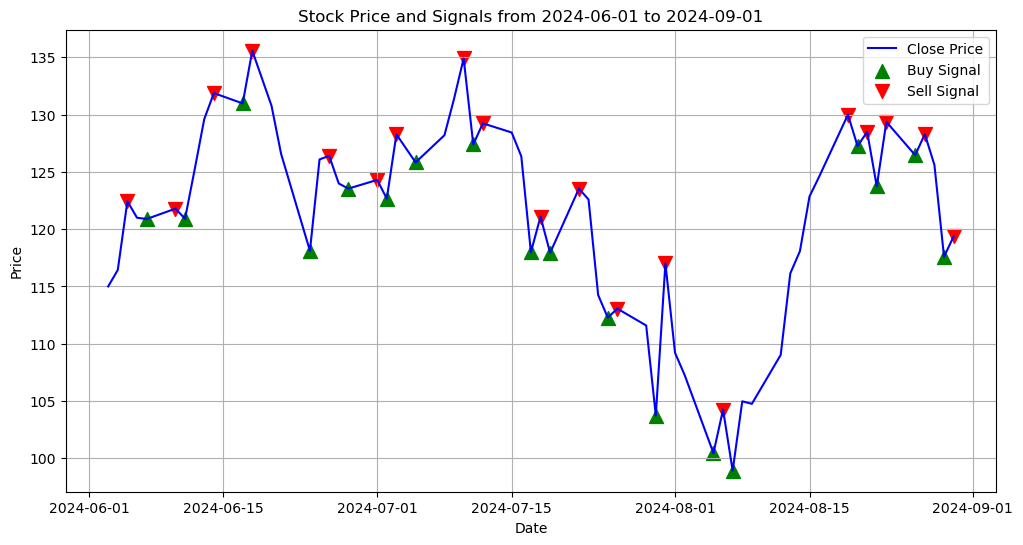

                 Close  Signal  Log_Returns        Peak   Valley  train_target
Date                                                                          
2020-03-31    6.590000     0.0          NaN         NaN      NaN             0
2020-04-01    6.076750     1.0    -0.081083         NaN  6.07675             1
2020-04-02    6.386750     1.0     0.049756         NaN      NaN             0
2020-04-03    6.097750     1.0    -0.046306         NaN      NaN             0
2020-04-06    6.710000     1.0     0.095679         NaN      NaN             0
...                ...     ...          ...         ...      ...           ...
2024-09-23  116.260002     1.0     0.002239         NaN      NaN             0
2024-09-24  120.870003     1.0     0.038887         NaN      NaN             0
2024-09-25  123.510002     1.0     0.021607         NaN      NaN             0
2024-09-26  124.040001    -1.0     0.004282  124.040001      NaN            -1
2024-09-27  121.400002    -1.0    -0.021513         

In [5]:
final_df = strategy.get_signal_dataframe() #with optimized parameters
plot_price_signals(final_df, '2024-06-01', '2024-09-01', signal_col='train_target') #3 months, training trade signals
print(final_df)

In [8]:
final_df.to_csv(f'../data/{ticker}_{start_date.strftime("%Y-%m-%d")}_{end_date.strftime("%Y-%m-%d")}_peak_valley.csv')

## CUM RETURNS FOLLOWING DAYS

Defining the strategy with a dummy df

In [37]:
# # Generate a date range for 10 days
# dates = pd.date_range(start='2023-09-01', periods=10, freq='D')

# # Generate random integers to simulate log returns
# log_returns = np.random.randint(-10, 10, size=10)

# # Create the dataframe
# dummy_df = pd.DataFrame({
#     'Date': dates,
#     'Log_Returns': log_returns
# })

# window = 3  # Define the window for the number of days
# threshold = 5  # Define the threshold

# # Calculate the sum of the next 'window' days' returns
# dummy_df['Log_Returns_next_N_days'] = sum(
#     dummy_df['Log_Returns'].shift(-i) for i in range(1, window + 1)
# )

# # Create the signal column based on the threshold
# dummy_df['Signal'] = dummy_df['Log_Returns_next_N_days'].apply(
#     lambda x: 1 if x > threshold else (-1 if x < -threshold else 0)
# )

# dummy_df